# Multiclass classification using perceptron

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from PlotFunction import plot_decision_surface_train_test, plot_decision_surface_predict

In [22]:
dataObj = datasets.load_iris()

In [23]:
df = pd.DataFrame(dataObj.data, columns=dataObj.feature_names)
df['target'] = dataObj.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [25]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [27]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
param = "firstTry"
paramSet = {
    "firstTry": {"eta0": 0.01, "n_iter_no_change": 3, "random_state": 5},
    "best": {"eta0": 0.1, "n_iter_no_change": 10, "random_state": 1},
}

In [29]:
ppn = Perceptron(
    eta0=paramSet[param]["eta0"],
    random_state=paramSet[param]["random_state"],
    verbose=1,
    n_iter_no_change=paramSet[param]["n_iter_no_change"],
)

In [30]:
# Training
ppn.fit(X_train_std, y_train)

-- Epoch 1
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 105, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 315, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 420, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 4 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 105, Avg. loss: 0.006018
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 2, Bias: 0.010000, T: 210, Avg. loss: 0.004592
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 2, Bias: 0.000000, T: 315, Avg. loss: 0.005640
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 2, Bias: -0.010000, T: 420, Avg. loss: 0.004548
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 2, Bias: -0.020000, T: 525, Avg. 

Perceptron(eta0=0.01, n_iter_no_change=3, random_state=5, verbose=1)

In [31]:
# Prediction
y_pred = ppn.predict(X_test_std)

In [32]:
# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

In [33]:
# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

In [34]:
print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

Misclassified examples: 14
Accuracy score: 0.6888888888888889


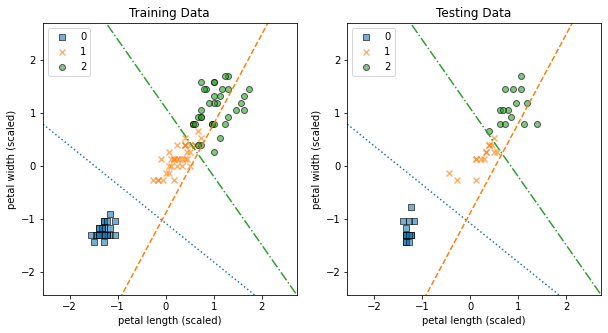

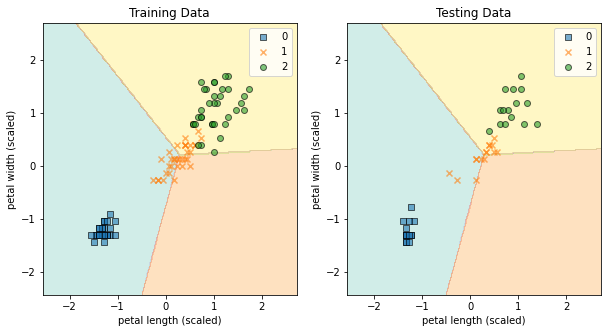

In [35]:
plot_decision_surface_train_test(X_train_std, X_test_std, y_train, y_test, ppn, filename="Images/T12_Img_Perceptron.png")

In [36]:
X1_min = X[:,0].min()
X1_max = X[:,0].max()
X2_min = X[:,1].min()
X2_max = X[:,1].max()

In [37]:
X1_new = np.random.uniform(low=X1_min, high=X1_max, size=(50,1))
X2_new = np.random.uniform(low=X2_min, high=X2_max, size=(50,1))
X_new = np.concatenate( (X1_new, X2_new) , axis=1)
temp = pd.DataFrame(X_new, columns=['X1','X2'])
temp.head()

,X1,X2
0,6.666377,0.207325
1,3.029161,0.605404
2,5.236730,0.359551
3,5.354005,1.408466
4,4.645981,0.568279


In [38]:
X_new_std =  sc.transform(X_new)

In [39]:
y_new =  ppn.predict(X_new_std)
print(y_new)

[1 0 1 2 1 0 1 0 2 0 0 0 2 0 1 1 0 0 0 2 1 0 0 2 0 0 0 2 1 2 2 0 2 0 0 1 0
 0 0 1 0 2 0 0 0 0 0 2 1 2]


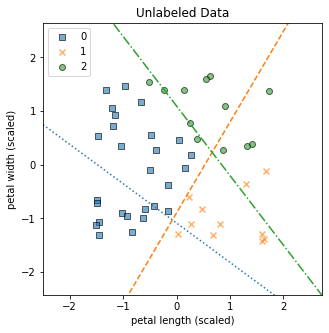

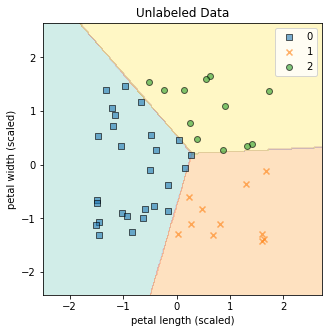

In [40]:
plot_decision_surface_predict(X_new_std, y_new, ppn, filename="Images/T12_Img_Perceptron_new.png")